# Instrucciones globales
A continuación hay algunos ejercicios avanzados sobre Python. La resolución de los mismos debe cumplir con las siguientes directrices:
- El código debe estar comentado.
- Los nombres de variables, funciones y clases deben ser lógicos y descriptivos.
- El código debe ser lo más encapsulado posible, utilizando el mayor número de funciones y clases posible.
- Se debe perseguir la automatización del código, evitando de esta forma código repetido o redundante.
- Las clases deberán incluir constructor, getters, setters y str de forma predeterminada salvo excepción justificada
- Imprescindible implementar control de excepciones en estos ejercicios
- Todos estos ejercicios tienen marge de mejora, ¡amplialos con alguna funcionalidad que se te ocurra!

## Enunciado ejercicio 1

El objetivo de este ejercicio es crear un programa en Python que permita leer un fichero JSON con información sobre incidencias en vuelos (__incidencias.json__), agregar nuevas incidencias al fichero, crear una base de datos en SQLite con la información de las incidencias (__incidencias.db__) y actualizar dicha base de datos con la información del fichero JSON.

El programa debe iniciar mostrando un menú de opciones que permite al usuario seleccionar una de las siguientes opciones:

1. Ver fichero JSON de incidencias: Esta función lee el fichero incidencias.json y muestra por pantalla la información de las incidencias de manera ordenada.
2. Añadir incidencia al fichero JSON de incidencias: Esta función agrega una nueva incidencia al fichero incidencias.json a través de preguntas hechas por teclado. Importante, el ID de la incidencia se tiene que generar automáticamente.
3. Crear base de datos de incidencias (solo estructura): Esta función crea una base de datos en SQLite con la estructura necesaria para almacenar la información de las incidencias.
4. Actualizar contenido base de datos de incidencias: Esta función actualiza la base de datos creada en el punto anterior con la información del fichero incidencias.json.
5. Ver contenido base de datos de incidencias: Esta función lee la información almacenada en la base de datos y la muestra por pantalla de manera ordenada.
6. Eliminar base de datos de incidencias: Esta función elimina la base de datos creada en el punto 3.
7. Salir

Importante, el fichero JSON lleva tíldes, tendréis que complementar open con __encoding='utf-8'__ para no perder el formato.

### Resultado

```python
--- MENÚ DE OPCIONES ---
1. Ver fichero JSON de incidencias
2. Añadir incidencia al fichero JSON de incidencias
3. Crear base de datos de incidencias (solo estructura)
4. Actualizar contenido base de datos de incidencias
5. Ver contenido base de datos de incidencias
6. Eliminar base de datos de incidencias
7. Salir

Seleccione una opción: 1
ID: INC001
Tipo: retraso
Aerolínea: American Airlines ( AA )
Vuelo: AA1234
Origen: Dallas
Destino: Nueva York
Hora de salida: 2023-03-20T08:30:00Z
Hora de llegada: 2023-03-20T12:45:00Z
Causa: El vuelo se retrasó debido a problemas técnicos con la aeronave.
--------------------------------------------------
ID: INC002
Tipo: cancelacion
Aerolínea: Delta Air Lines ( DL )
Vuelo: DL5678
Origen: Los Angeles
Destino: Atlanta
Hora de salida: 2023-03-21T10:15:00Z
Hora de llegada: 2023-03-21T16:25:00Z
Causa: El vuelo se canceló debido a las condiciones climáticas adversas en el aeropuerto de destino.
--------------------------------------------------
... Y aquí el resto de incidencias con el mismo formato

Seleccione una opción: 2
Ingrese el tipo de la incidencia (retraso o cancelacion): retraso
Ingrese el nombre de la aerolínea: IBERIA
Ingrese el código de la aerolínea: IBE
Ingrese el número del vuelo: 1234
Ingrese el origen del vuelo: Madrid
Ingrese el destino del vuelo: Barcelona
Ingrese la hora de salida del vuelo (formato yyyy-mm-ddThh:mm:ssZ): 2023-03-25T19:00:00Z
Ingrese la hora de llegada del vuelo (formato yyyy-mm-ddThh:mm:ssZ): 2023-03-26T11:45:00Z
Ingrese el tipo o categoría de la razón de la incidencia: Clima
Ingrese la descripción de la razón de la incidencia: Nieve intensa en pista
La nueva incidencia ha sido agregada con éxito al archivo JSON de incidencias.

Seleccione una opción: 3
¡La base de datos de incidencias ha sido creada con éxito!

Seleccione una opción: 4
¡La base de datos de incidencias ha sido actualizada con éxito!

Seleccione una opción: 5
ID: INC001
Tipo: retraso
Aerolínea: American Airlines ( AA )
Vuelo: AA1234
Origen: Dallas
Destino: Nueva York
Hora de salida: 2023-03-20T08:30:00Z
Hora de llegada: 2023-03-20T12:45:00Z
Causa: El vuelo se retrasó debido a problemas técnicos con la aeronave.
--------------------------------------------------
ID: INC002
Tipo: cancelacion
Aerolínea: Delta Air Lines ( DL )
Vuelo: DL5678
Origen: Los Angeles
Destino: Atlanta
Hora de salida: 2023-03-21T10:15:00Z
Hora de llegada: 2023-03-21T16:25:00Z
Causa: El vuelo se canceló debido a las condiciones climáticas adversas en el aeropuerto de destino.
--------------------------------------------------
... Y aquí el resto de incidencias con el mismo formato

Seleccione una opción: 6
¡La base de datos de incidencias ha sido eliminada con éxito!
```


In [ ]:
import json
import sqlite3
import os

def ver_json():
    try:
        with open('incidencias.json', encoding='utf-8') as f:
            data = json.load(f)
            for incidencia in data['incidencias']:
                print('ID:', incidencia['id'])
                print('Tipo:', incidencia['tipo'])
                print('Aerolínea:', incidencia['aerolinea']['nombre'], '(', incidencia['aerolinea']['codigo'], ')')
                print('Vuelo:', incidencia['vuelo']['numero'])
                print('Origen:', incidencia['vuelo']['origen'])
                print('Destino:', incidencia['vuelo']['destino'])
                print('Hora de salida:', incidencia['vuelo']['hora_salida'])
                print('Hora de llegada:', incidencia['vuelo']['hora_llegada'])
                print('Causa:', incidencia['razon']['descripcion'])
                print('-'*50)
    except FileNotFoundError:
        print('Error: el archivo JSON de incidencias no existe.')
    except json.decoder.JSONDecodeError:
        print('Error: el archivo JSON de incidencias no es válido.')
        
def agregar_incidencia():
    try:
        # Cargar los datos del archivo JSON existente
        with open('incidencias.json', encoding='utf-8') as f:
            data = json.load(f)

        # El ID de la incidencia debe seguir una secuencia, se genera automaticamente
        # Generar el ID de la nueva incidencia siguiendo una secuencia
        ids_existentes = [incidencia['id'] for incidencia in data['incidencias']]
        if len(ids_existentes) == 0:
            nuevo_id = 'INC001'
        else:
            ultimo_id = max(ids_existentes)
            nuevo_id_num = int(ultimo_id[3:]) + 1
            nuevo_id = 'INC{:03d}'.format(nuevo_id_num)
            
        # Solicitar los datos de la nueva incidencia al usuario
        tipo = input('Ingrese el tipo de la incidencia (retraso o cancelacion): ')
        aerolinea_nombre = input('Ingrese el nombre de la aerolínea: ')
        aerolinea_codigo = input('Ingrese el código de la aerolínea: ')
        vuelo_numero = input('Ingrese el número del vuelo: ')
        origen = input('Ingrese el origen del vuelo: ')
        destino = input('Ingrese el destino del vuelo: ')
        hora_salida = input('Ingrese la hora de salida del vuelo (formato yyyy-mm-ddThh:mm:ssZ): ')
        hora_llegada = input('Ingrese la hora de llegada del vuelo (formato yyyy-mm-ddThh:mm:ssZ): ')
        razon_tipo = input('Ingrese el tipo o categoría de la razón de la incidencia: ')
        razon_descripcion = input('Ingrese la descripción de la razón de la incidencia: ')

        # Crear un nuevo diccionario con los datos de la nueva incidencia
        nueva_incidencia = {
            'id': nuevo_id,
            'tipo': tipo,
            'aerolinea': {
                'nombre': aerolinea_nombre,
                'codigo': aerolinea_codigo
            },
            'vuelo': {
                'numero': vuelo_numero,
                'origen': origen,
                'destino': destino,
                'hora_salida': hora_salida,
                'hora_llegada': hora_llegada
            },
            'razon': {
                'tipo': razon_tipo,
                'descripcion': razon_descripcion
            }
        }

        # Agregar la nueva incidencia a la lista de incidencias en el archivo JSON
        data['incidencias'].append(nueva_incidencia)

        # Escribir los datos actualizados en el archivo JSON
        with open('incidencias.json', 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4)

        print('La nueva incidencia ha sido agregada con éxito al archivo JSON de incidencias.')

    except FileNotFoundError:
        print('Error: el archivo JSON de incidencias no existe.')
    except json.decoder.JSONDecodeError:
        print('Error: el archivo JSON de incidencias no es válido.')
    except Exception as e:
        print('Error:', e)

def crear_base_datos():
    try:
        conn = sqlite3.connect('incidencias.db')
        conn.execute('CREATE TABLE IF NOT EXISTS incidencias \
                      (id TEXT PRIMARY KEY, tipo TEXT, aerolinea_nombre TEXT, aerolinea_codigo TEXT, \
                       vuelo_numero TEXT, origen TEXT, destino TEXT, hora_salida TEXT, hora_llegada TEXT, razon_descripcion TEXT)')
        conn.close()
        print('¡La base de datos de incidencias ha sido creada con éxito!')
    except sqlite3.Error as e:
        print('Error al acceder a la base de datos:', e)
    except Exception as e:
        print('Error:', e)

def actualizar_base_datos():
    try:
        with open('incidencias.json', encoding='utf-8') as f:
            data = json.load(f)
            conn = sqlite3.connect('incidencias.db')
            for incidencia in data['incidencias']:
                conn.execute("INSERT OR IGNORE INTO incidencias \
                              (id, tipo, aerolinea_nombre, aerolinea_codigo, vuelo_numero, origen, destino, hora_salida, hora_llegada, razon_descripcion) \
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
                             (incidencia['id'], incidencia['tipo'], incidencia['aerolinea']['nombre'], incidencia['aerolinea']['codigo'],
                              incidencia['vuelo']['numero'], incidencia['vuelo']['origen'], incidencia['vuelo']['destino'],
                              incidencia['vuelo']['hora_salida'], incidencia['vuelo']['hora_llegada'], incidencia['razon']['descripcion']))
            conn.commit()
            conn.close()
            print('¡La base de datos de incidencias ha sido actualizada con éxito!')
    except FileNotFoundError:
        print('Error: el archivo JSON de incidencias no existe.')
    except json.decoder.JSONDecodeError:
        print('Error: el archivo JSON de incidencias no es válido.')
    except sqlite3.Error as e:
        print('Error al acceder a la base de datos:', e)
    except Exception as e:
        print('Error:', e)
        
def leer_base_datos():
    try:
        conn = sqlite3.connect('incidencias.db')
        cursor = conn.cursor()
        cursor.execute('SELECT * FROM incidencias')
        rows = cursor.fetchall()
        if len(rows) == 0:
            print('No hay datos en la base de datos de incidencias.')
        else:
            for row in rows:
                print('ID:', row[0])
                print('Tipo:', row[1])
                print('Aerolínea:', row[2], '(', row[3], ')')
                print('Vuelo:', row[4])
                print('Origen:', row[5])
                print('Destino:', row[6])
                print('Hora de salida:', row[7])
                print('Hora de llegada:', row[8])
                print('Causa:', row[9])
                print('-'*50)
        conn.close()
    except sqlite3.Error as e:
        print('Error al acceder a la base de datos:', e)
    except Exception as e:
        print('Error:', e)
        
def eliminar_base_datos():
    try:
        if os.path.exists('incidencias.db'):
            os.remove('incidencias.db')
            print('¡La base de datos de incidencias ha sido eliminada con éxito!')
        else:
            print('La base de datos de incidencias no existe.')
    except Exception as e:
        print('Error:', e)

while True:
    print('\n--- MENÚ DE OPCIONES ---')
    print('1. Ver fichero JSON de incidencias')
    print('2. Añadir incidencia al fichero JSON de incidencias')
    print('3. Crear base de datos de incidencias (solo estructura)')
    print('4. Actualizar contenido base de datos de incidencias')
    print('5. Ver contenido base de datos de incidencias')
    print('6. Eliminar base de datos de incidencias')
    print('7. Salir')

    opcion = input('\nSeleccione una opción: ')

    if opcion == '1':
        ver_json()
    elif opcion == '2':
        agregar_incidencia()
    elif opcion == '3':
        crear_base_datos()
    elif opcion == '4':
        actualizar_base_datos()
    elif opcion == '5':
        leer_base_datos()
    elif opcion == '6':
        eliminar_base_datos()
    elif opcion == '7':
        print('¡Hasta luego!')
        break
    else:
        print('Opción inválida. Intente de nuevo.')

## Enunciado ejercicio 2

Se te ha proporcionado un archivo JSON llamado __log_tren.json__ que contiene información de los errores que se han presentado en un tren en diferentes fechas. Se requiere que desarrolles un programa en Python que permita analizar los datos del archivo y presentar diferentes métricas y reportes, además de permitir al usuario realizar búsquedas de errores por tipo, nivel o categoría.

El programa debe iniciar mostrando un menú de opciones que permite al usuario seleccionar una de las siguientes opciones:

1. Número total de errores
2. Número de errores por tipo (type): Deben aparecer todos los tipos y el número de errores que coinciden con ese tipo
3. Número de errores por nivel (level): Deben aparecer todos los niveles y el número de errores que coinciden con ese nivel
4. Número de errores por categoría (category): Deben aparecer todas las categorías y el número de errores que coinciden con esa categoría
5. Palabras más repetidas en la descripción: Contabilizaremos únicamente las palabras que tienen de 3 caracteres en adelante (para omitir palabras como "el", "del", "no")
6. Errores por día: Un listado de días y todos los errores asociados a ese día
7. Búsqueda de errores: Permitir buscar al usuario errores por type, level o category
8. Salir

Importante, el fichero JSON puede llevar tíldes, tendréis que complementar open con __encoding='utf-8'__ para no perder el formato.
Importante. En este ejercicio se debe llevar a cabo mucho trabajo de contabilizar elementos. Se puede realizar a la vieja usanza o investigar sobre el siguiente recurso:

__from collections import Counter__


### Resultado

```python
Seleccione una opción:
1. Número total de errores
2. Número de errores por tipo (type)
3. Número de errores por nivel (level)
4. Número de errores por categoria (category)
5. Palabras más repetidas en la descripción
6. Errores por día
7. Búsqueda de errores
8. Salir
Ingrese una opción: 1
 > Número total de errores: 10

Ingrese una opción: 2
 > Número de errores por tipo (type): {'error': 10}

Ingrese una opción: 3
 > Número de errores por nivel (level): {'warning': 5, 'critical': 3, 'info': 2}

Ingrese una opción: 4
 > Número de errores por categoria (category): {'hardware': 5, 'software': 5}

Ingrese una opción: 5
 > Palabras más repetidas en la descripción: {'está': 6, 'sistema': 6, 'fallando.': 3, 'velocidad': 2, 'vagón': 2}

Ingrese una opción: 6

 > Errores por día:
Fecha: 2023-03-18, Número de errores: 1
   - Tipo: error, Level: warning, Category: hardware, Descripción: El sensor de velocidad está fallando.
Fecha: 2023-03-19, Número de errores: 2
   - Tipo: error, Level: critical, Category: software, Descripción: El sistema de frenos no está respondiendo.
   - Tipo: error, Level: warning, Category: hardware, Descripción: La puerta del vagón está atascada.
Fecha: 2023-03-20, Número de errores: 2
   - Tipo: error, Level: info, Category: software, Descripción: La actualización de software ha sido realizada con éxito.
   - Tipo: error, Level: warning, Category: hardware, Descripción: El aire acondicionado no funciona correctamente.
Fecha: 2023-03-21, Número de errores: 2
   - Tipo: error, Level: critical, Category: software, Descripción: El sistema de control de velocidad está fallando.
   - Tipo: error, Level: warning, Category: hardware, Descripción: El sistema de iluminación del vagón no funciona correctamente.
Fecha: 2023-03-22, Número de errores: 2
   - Tipo: error, Level: info, Category: software, Descripción: El sistema de información de pasajeros ha sido actualizado.
   - Tipo: error, Level: warning, Category: hardware, Descripción: El sistema de comunicación interna del tren no está funcionando.
Fecha: 2023-03-23, Número de errores: 1
   - Tipo: error, Level: critical, Category: software, Descripción: El sistema de control de puertas está fallando.

Ingrese una opción: 7
Seleccione el tipo de búsqueda:
1. Buscar por type
2. Buscar por level
3. Buscar por category
Ingrese un número para seleccionar: 2
Seleccione level a buscar:
1. critical
2. info
3. warning
Ingrese un número para seleccionar: 1

Resultados de búsqueda por level (critical):
ID: LOG0002, Tipo: error, Level: critical, Category: software, Descripción: El sistema de frenos no está respondiendo.
ID: LOG0006, Tipo: error, Level: critical, Category: software, Descripción: El sistema de control de velocidad está fallando.
ID: LOG0010, Tipo: error, Level: critical, Category: software, Descripción: El sistema de control de puertas está fallando.

```

In [ ]:
import json
from collections import Counter

# Número total de errores
def num_errores():
    try:
        return len(data['log'])
    except KeyError:
        print('Error: el archivo JSON no tiene la estructura esperada.')
        return None

# Número de errores de cada tipo
def num_errores_por_tipo():
    try:
        types = [error["type"] for error in data['log']]
        return dict(Counter(types))
    except KeyError:
        print('Error: el archivo JSON no tiene la estructura esperada.')
        return None

# Número de errores de cada level
def num_errores_por_level():
    try:
        levels = [error["level"] for error in data['log']]
        return dict(Counter(levels))
    except KeyError:
        print('Error: el archivo JSON no tiene la estructura esperada.')
        return None

# Número de errores de cada category
def num_errores_por_category():
    try:
        categories = [error["category"] for error in data['log']]
        return dict(Counter(categories))
    except KeyError:
        print('Error: el archivo JSON no tiene la estructura esperada.')
        return None

# Listado de los días en los que hubo errores y número total de errores por día
def errores_por_dia():
    try:
        fechas_errores = [error["timestamp"][:10] for error in data['log']]
        diccionario_errores = dict(Counter(fechas_errores))
        for fecha, num_errores in diccionario_errores.items():
            print(f'Fecha: {fecha}, Número de errores: {num_errores}')
            for error in data['log']:
                if error["timestamp"][:10] == fecha:
                    print(f'   - Tipo: {error["type"]}, Level: {error["level"]}, Category: {error["category"]}, Descripción: {error["description"]}')
    except KeyError:
        print('Error: el archivo JSON no tiene la estructura esperada.')
        return None

# Listado de las palabras más repetidas del campo description
def palabras_mas_repetidas():
    try:
        descripciones = [error["description"] for error in data['log']]
        palabras = []
        for descripcion in descripciones:
            for palabra in descripcion.split():
                # Consideramos importantes las palabras que tienen más de 3 letras
                if len(palabra) > 3:
                    palabras.append(palabra)
            
        return dict(Counter(palabras).most_common(5))
    except KeyError:
        print('Error: el archivo JSON no tiene la estructura esperada.')
        return None

# Función donde el usuario pueda buscar por type, level o category
def buscar_error():
    print("Seleccione el tipo de búsqueda:")
    print("1. Buscar por type")
    print("2. Buscar por level")
    print("3. Buscar por category")
    opcion_busqueda = input("Ingrese un número para seleccionar: ")
    
    if opcion_busqueda == "1":
        criterio = "type"
    elif opcion_busqueda == "2":
        criterio = "level"
    elif opcion_busqueda == "3":
        criterio = "category"
    else:
        print("Opción inválida.")
        return
    
    # Obtener opciones de búsqueda únicas
    opciones = set([error[criterio] for error in data['log']])

    # Imprimir opciones de búsqueda
    print(f"Seleccione {criterio} a buscar:")
    for i, opcion in enumerate(opciones):
        print(f"{i+1}. {opcion}")

    # Leer opción de búsqueda del usuario
    opcion = input("Ingrese un número para seleccionar: ")

    # Validar opción de búsqueda
    try:
        opcion = int(opcion)
        if opcion < 1 or opcion > len(opciones):
            print("Opción inválida.")
            return
    except ValueError:
        print("Opción inválida.")
        return

    # Filtrar errores según opción de búsqueda
    errores = [error for error in data['log'] if error[criterio] == list(opciones)[opcion-1]]

    # Mostrar resultados de búsqueda
    print(f"\nResultados de búsqueda por {criterio} ({list(opciones)[opcion-1]}):")
    for error in errores:
        print(f"ID: {error['id']}, Tipo: {error['type']}, Level: {error['level']}, Category: {error['category']}, Descripción: {error['description']}")


if __name__ == "__main__":
    
    # Cargar los datos del archivo JSON
    try:
        with open('log_tren.json', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print('Error: el archivo JSON no existe.')
        exit()
    except json.decoder.JSONDecodeError:
        print('Error: el archivo JSON no es válido.')
        exit()
    
    while True:
        print("\nSeleccione una opción:")
        print("1. Número total de errores")
        print("2. Número de errores por tipo (type)")
        print("3. Número de errores por nivel (level)")
        print("4. Número de errores por categoria (category)")
        print("5. Palabras más repetidas en la descripción")
        print("6. Errores por día")
        print("7. Búsqueda de errores")
        print("8. Salir")
        opcion = input("Ingrese una opción: ")

        if opcion == "1":
            print(' > Número total de errores:', num_errores())
        elif opcion == "2":
            print(' > Número de errores por tipo (type):', num_errores_por_tipo())
        elif opcion == "3":
            print(' > Número de errores por nivel (level):', num_errores_por_level())
        elif opcion == "4":
            print(' > Número de errores por categoria (category):', num_errores_por_category())
        elif opcion == "5":
            print(' > Palabras más repetidas en la descripción:', palabras_mas_repetidas())
        elif opcion == "6":
            print('\n > Errores por día:')
            errores_por_dia()
        elif opcion == "7":
            buscar_error()
        elif opcion == "8":
            break
        else:
            print("Opción inválida. Inténtelo de nuevo.")   

## Enunciado ejercicio 3

Vamos a trabajar con Pandas, para ello vamos a utilizar el fichero __iss.csv__

Resolver las siguiente funcionalidades:
1. Calcular la media de temperatura en Houston.
2. Calcular la mediana de la presión en la ISS.
3. Calcular la desviación estándar de la humedad en la ISS.
4. Calcular la suma del dióxido de carbono (CO2) en la ISS en los primeros 5 minutos.
5. Calcular la máxima radiación solar en la ISS.
6. Contar cuántos minutos en los que la temperatura en Houston supera los 23 grados.
7. Obtener la fecha y hora del minuto con la mínima presión en la ISS.
8. Obtener los datos del minuto con la máxima humedad en la ISS.
9. Agrupar los datos por cada 10 minutos y calcular la media de temperatura en Houston y la presión en la ISS.
10. Calcular la correlación entre la temperatura en Houston y la presión en la ISS.
11. Calcular la media de la temperatura en la ISS para cada hora del día
12. Calcular el tiempo que estuvo la humedad por encima del 20% en la ISS
13. Calcular los minutos que la presión en Houston estuvo por encima de la presión en la ISS
14. Calcular cual es el periodo de tiempo más largo en el que la temperatura en Houston fue mayor que en la ISS
15. Calcular cuantas veces la humedad en la ISS fue superior al 30% y la radiación solar fue inferior a 50
16. Calcular cuantos minutos la presión en Houston estuvo por encima de 910 y la humedad en la ISS por debajo del 25%
17. Calcular cual fue la temperatura media en la ISS cada 10 minutos en los días que la radiación solar estuvo por encima de 500
18. Calcular cuantos minutos el flujo de aire en la ISS estuvo por debajo del valor medio
19. Calcular cuantas veces la temperatura en Houston fue más de 2 grados superior a la temperatura en la ISS y la presión en Houston estuvo por encima de 1010
20. Generar el siguiente conjunto de gráficos (se ven un poco más abajo)

### Resultados

```python

La temperatura media en Houston es: 21.31

La mediana de la presión en la ISS es: 994.00

La desviación estándar de la humedad en la ISS es: 9.92

La suma del dióxido de carbono en la ISS en los primeros 5 minutos es: 4100

La máxima radiación solar en la ISS es: 1220

Hay 8 minutos en los que la temperatura en Houston supera los 23 grados

La fecha y hora del minuto con la mínima presión en la ISS es: 60

Los datos del minuto con la máxima humedad en la ISS son:
timestamp              2023-03-24 00:00:00+00:00
temperature_houston                         24.4
pressure_houston                            1014
temperature_iss                             21.8
pressure_iss                                1010
humidity_iss                                  35
CO2_iss                                      800
oxygen_iss                                  20.9
airflow_iss                                  1.2
solar_radiation_iss                          800
Name: 0, dtype: object

Datos cada 10 minutos y media de temperatura en Houston y la presión en la ISS
                            temperature_houston  pressure_iss
timestamp                                                   
2023-03-24 00:00:00+00:00                23.15        1007.3
2023-03-24 00:10:00+00:00                22.25         997.5
2023-03-24 00:20:00+00:00                21.95         997.5
2023-03-24 00:30:00+00:00                21.15         987.5
2023-03-24 00:40:00+00:00                19.95         977.5
2023-03-24 00:50:00+00:00                18.95         967.5
2023-03-24 01:00:00+00:00                21.75         993.5
2023-03-24 01:10:00+00:00                21.40         992.0

La correlación entre la temperatura en Houston y la presión en la ISS es:
                     temperature_houston  pressure_iss
temperature_houston             1.000000      0.961118
pressure_iss                    0.961118      1.000000

La media de la temperatura en la ISS para cada hora del día es:hour
0    19.616667
1    20.036364
Name: temperature_iss, dtype: float64

El tiempo que la humedad estuvo por encima del 20% fue de 40 minutos.

La presión en Houston estuvo por encima de la ISS durante 710 minutos.

El periodo más largo en el que la temperatura en Houston fue mayor que en la ISS es de: 0 days 00:01:00

La humedad en la ISS fue superior al 30% y la radiación solar fue inferior a 50 en 0 ocasiones.

Minutos que la presión en Houston estuvo por encima de 910 y la humedad en la ISS por debajo del 25%: 59.0

Temperatura media en la ISS cada 10 minutos en los días que la radiación solar estuvo por encima de 500
 timestamp
2023-03-24 00:00:00+00:00    21.45
2023-03-24 00:10:00+00:00    20.45
2023-03-24 00:20:00+00:00    20.45
2023-03-24 00:30:00+00:00    19.45
2023-03-24 00:40:00+00:00    18.45
2023-03-24 00:50:00+00:00    17.45
2023-03-24 01:00:00+00:00    20.05
2023-03-24 01:10:00+00:00    19.90
Freq: 10T, Name: temperature_iss, dtype: float64

Minutos que el flujo de aire en la ISS estuvo por debajo del valor medio: 70.0

Número de veces que la temperatura en Houston fue más de 2 grados superior a la temperatura en la ISS y la presión en Houston estuvo por encima de 1010: 1

GRÁFICAS
            
```
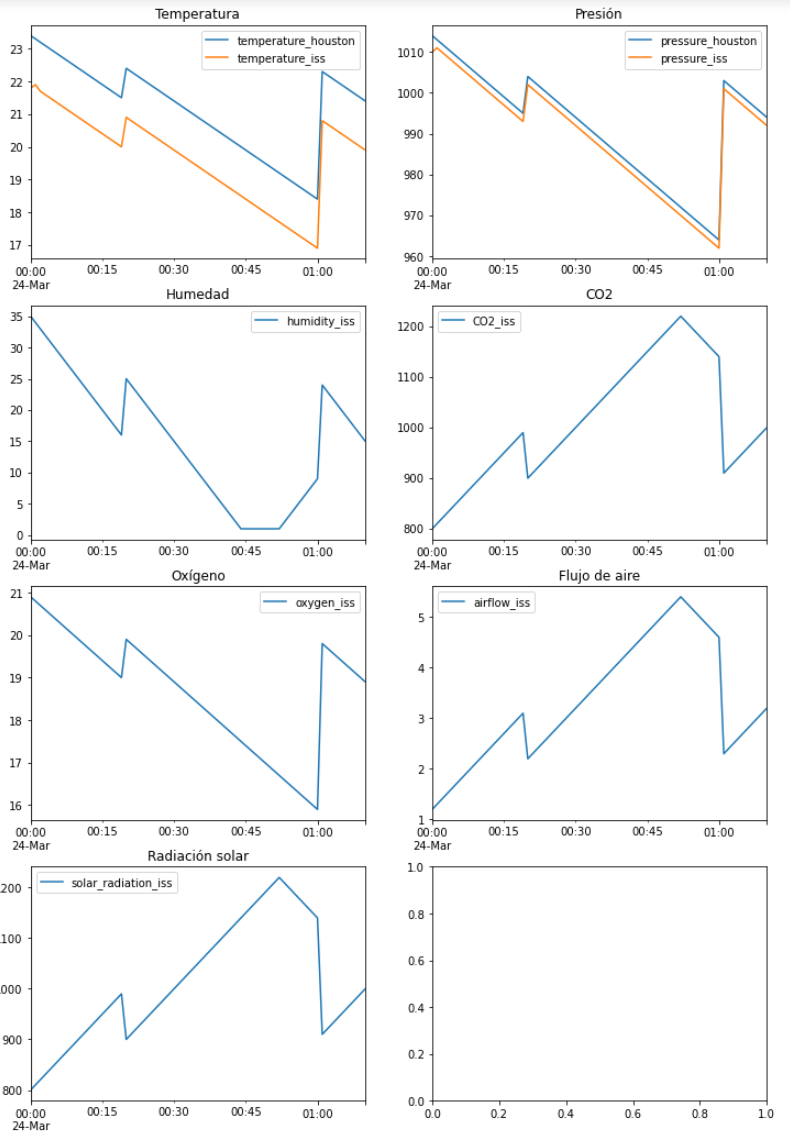


La temperatura media en Houston es: 21.31

La mediana de la presión en la ISS es: 994.00

La desviación estándar de la humedad en la ISS es: 9.92

La suma del dióxido de carbono en la ISS en los primeros 5 minutos es: 4100

La máxima radiación solar en la ISS es: 1220

Hay 8 minutos en los que la temperatura en Houston supera los 23 grados

La fecha y hora del minuto con la mínima presión en la ISS es: 60

Los datos del minuto con la máxima humedad en la ISS son:
timestamp              2023-03-24 00:00:00+00:00
temperature_houston                         24.4
pressure_houston                            1014
temperature_iss                             21.8
pressure_iss                                1010
humidity_iss                                  35
CO2_iss                                      800
oxygen_iss                                  20.9
airflow_iss                                  1.2
solar_radiation_iss                          800
Name: 0, dtype: object

Datos cada 10 min

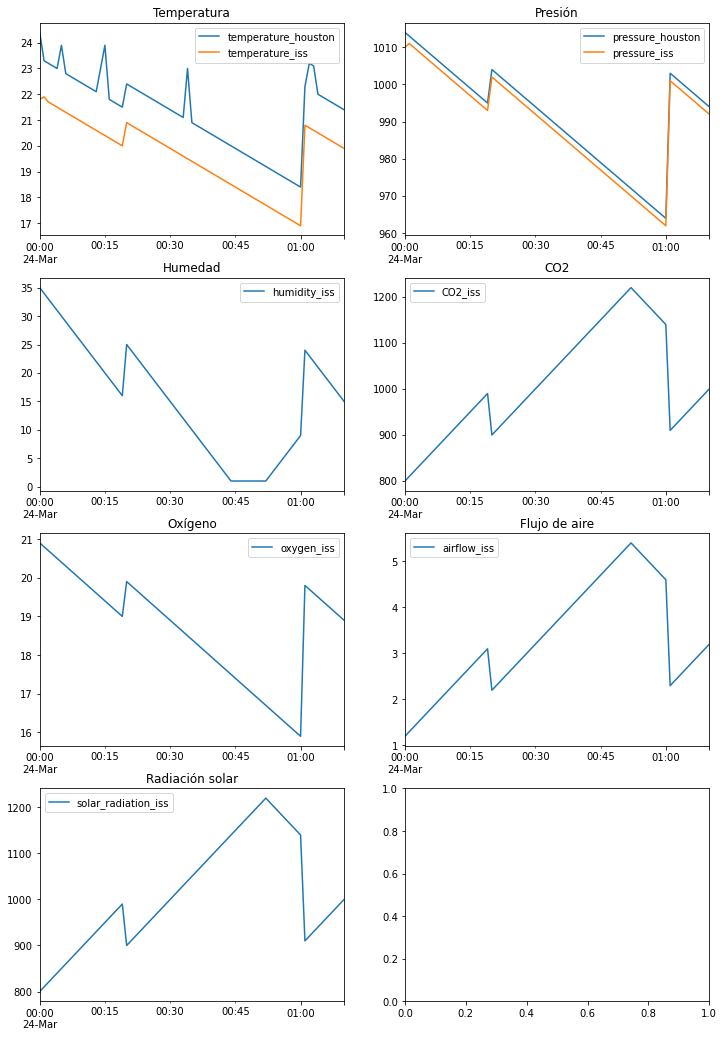

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo csv
df = pd.read_csv("iss.csv", parse_dates=["timestamp"])

# Imprimir las primeras 5 filas del dataframe
#print(df.head())

# Obtener información general sobre el dataframe
#print(df.info())

# Obtener estadísticas descriptivas de las variables numéricas
#print(df.describe())

# Obtener la correlación entre las variables numéricas
#print(df.corr())

# 01. Calcular la media de temperatura en Houston.
temp_houston_mean = df['temperature_houston'].mean()
print(f"\nLa temperatura media en Houston es: {temp_houston_mean:.2f}")

# 02. Calcular la mediana de la presión en la ISS.
pressure_iss_median = df['pressure_iss'].median()
print(f"\nLa mediana de la presión en la ISS es: {pressure_iss_median:.2f}")

# 03. Calcular la desviación estándar de la humedad en la ISS.
humidity_iss_std = df['humidity_iss'].std()
print(f"\nLa desviación estándar de la humedad en la ISS es: {humidity_iss_std:.2f}")

# 04. Calcular la suma del dióxido de carbono (CO2) en la ISS en los primeros 5 minutos.
co2_iss_sum = df.loc[:4, 'CO2_iss'].sum()
print(f"\nLa suma del dióxido de carbono en la ISS en los primeros 5 minutos es: {co2_iss_sum}")

# 05. Calcular la máxima radiación solar en la ISS.
solar_radiation_iss_max = df['solar_radiation_iss'].max()
print(f"\nLa máxima radiación solar en la ISS es: {solar_radiation_iss_max}")

# 06. Contar cuántos minutos en los que la temperatura en Houston supera los 23 grados.
temp_houston_over_23 = (df['temperature_houston'] > 23).sum()
print(f"\nHay {temp_houston_over_23} minutos en los que la temperatura en Houston supera los 23 grados")

# 07. Obtener la fecha y hora del minuto con la mínima presión en la ISS.
min_pressure_iss = df['pressure_iss'].idxmin()
print(f"\nLa fecha y hora del minuto con la mínima presión en la ISS es: {min_pressure_iss}")

# 08. Obtener los datos del minuto con la máxima humedad en la ISS.
max_humidity_iss = df.loc[df['humidity_iss'].idxmax()]
print(f"\nLos datos del minuto con la máxima humedad en la ISS son:\n{max_humidity_iss}")

# 09. Agrupar los datos por cada 10 minutos y calcular la media de temperatura en Houston y la presión en la ISS.
grouped_df = df.groupby(pd.Grouper(key='timestamp', freq='10min')).agg({'temperature_houston':'mean', 'pressure_iss':'mean'})
print("\nDatos cada 10 minutos y media de temperatura en Houston y la presión en la ISS\n", grouped_df)

# 10. Calcular la correlación entre la temperatura en Houston y la presión en la ISS.
correlation = df[['temperature_houston', 'pressure_iss']].corr()
print(f"\nLa correlación entre la temperatura en Houston y la presión en la ISS es:\n{correlation}")

# 11. Calcular la media de la temperatura en la ISS para cada hora del día
df['hour'] = df['timestamp'].dt.hour
temperatura_media_por_hora = df.groupby('hour')['temperature_iss'].mean()
print(f"\nLa media de la temperatura en la ISS para cada hora del día es:{temperatura_media_por_hora}")

# 12. Calcular el tiempo que estuvo la humedad por encima del 20% en la ISS
humidity_above_20 = df["humidity_iss"] > 20
time_above_20 = (humidity_above_20 != humidity_above_20.shift()).cumsum() * 10  # Intervalo de 10 minutos
total_time_above_20 = time_above_20[humidity_above_20].max() - time_above_20[humidity_above_20].min()
print(f"\nEl tiempo que la humedad estuvo por encima del 20% fue de {total_time_above_20} minutos.")

# 13. Calcular los minutos que la presión en Houston estuvo por encima de la presión en la ISS
pressure_above_iss = df["pressure_houston"] > df["pressure_iss"]
time_above_iss_pressure = (pressure_above_iss != pressure_above_iss.shift()).cumsum() * 10  # Intervalo de 10 minutos
total_time_above_iss_pressure = time_above_iss_pressure[pressure_above_iss].count() * 10
print(f"\nLa presión en Houston estuvo por encima de la ISS durante {total_time_above_iss_pressure} minutos.")

# 14. Calcular cual es el periodo de tiempo más largo en el que la temperatura en Houston fue mayor que en la ISS
df_filtered = df[df["temperature_houston"] > df["temperature_iss"]] # Filtrar por temperatura Houston mayor que ISS
df_filtered["time_diff"] = df_filtered["timestamp"].diff() # Calcular diferencia de tiempo entre valores consecutivos
df_filtered["group"] = (df_filtered["time_diff"] != pd.Timedelta(minutes=10)).cumsum() # Agrupar por rachas de temperatura Houston mayor que ISS
time_by_group = df_filtered.groupby("group")["time_diff"].sum() # Calcular el tiempo total de cada grupo
max_period = time_by_group.max() # Obtener el periodo más largo
print(f"\nEl periodo más largo en el que la temperatura en Houston fue mayor que en la ISS es de: {max_period}")

# 15. Calcular cuantas veces la humedad en la ISS fue superior al 30% y la radiación solar fue inferior a 50
count = df.query("humidity_iss > 30 and solar_radiation_iss < 50").shape[0]
print(f"\nLa humedad en la ISS fue superior al 30% y la radiación solar fue inferior a 50 en {count} ocasiones.")

# 16. Calcular cuantos minutos la presión en Houston estuvo por encima de 910 y la humedad en la ISS por debajo del 25%
df_houston_iss = df[["timestamp", "pressure_houston"]][(df["pressure_houston"] > 910) & (df["humidity_iss"] < 25)]
delta_t = df_houston_iss["timestamp"].diff().sum()
count = delta_t.total_seconds() / 60
print(f"\nMinutos que la presión en Houston estuvo por encima de 910 y la humedad en la ISS por debajo del 25%: {count}")

# 17. Calcular cual fue la temperatura media en la ISS cada 10 minutos en los días que la radiación solar estuvo por encima de 500
df_filtered = df[df["solar_radiation_iss"] > 500]
df_final = df_filtered.groupby(pd.Grouper(key="timestamp", freq="10Min")).mean()["temperature_iss"]
print("\nTemperatura media en la ISS cada 10 minutos en los días que la radiación solar estuvo por encima de 500\n", df_final)

# 18. Calcular cuantos minutos el flujo de aire en la ISS estuvo por debajo del valor medio
mean_airflow = df["airflow_iss"].mean()
df_filtered = df[df["airflow_iss"] < mean_airflow]
delta_t = df_filtered["timestamp"].diff().sum()
count = delta_t.total_seconds() / 60
print(f"\nMinutos que el flujo de aire en la ISS estuvo por debajo del valor medio: {count}")

# 19. Calcular cuantas veces la temperatura en Houston fue más de 2 grados superior a la temperatura en la ISS y la presión en Houston estuvo por encima de 1010
df_filtered = df[(df["temperature_houston"] - df["temperature_iss"] >= 2) & (df["pressure_houston"] > 1010)]
print(f"\nNúmero de veces que la temperatura en Houston fue más de 2 grados superior a la temperatura en la ISS y la presión en Houston estuvo por encima de 1010: {len(df_filtered)}")

# 20. Generar el siguiente conjunto de gráficos
print("\nGRÁFICAS")
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

df.set_index("timestamp")[["temperature_houston", "temperature_iss"]].plot(ax=axs[0,0], title="Temperatura", xlabel="")
df.set_index("timestamp")[["pressure_houston", "pressure_iss"]].plot(ax=axs[0,1], title="Presión", xlabel="")
df.set_index("timestamp")[["humidity_iss"]].plot(ax=axs[1,0], title="Humedad", xlabel="")
df.set_index("timestamp")[["CO2_iss"]].plot(ax=axs[1,1], title="CO2", xlabel="")
df.set_index("timestamp")[["oxygen_iss"]].plot(ax=axs[2,0], title="Oxígeno", xlabel="")
df.set_index("timestamp")[["airflow_iss"]].plot(ax=axs[2,1], title="Flujo de aire", xlabel="")
df.set_index("timestamp")[["solar_radiation_iss"]].plot(ax=axs[3,0], title="Radiación solar", xlabel="")

plt.show()